In [1]:
## This is used in the introduction to visualize the effect of the single line
import glob
import cv2
import skimage
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
# Please change the data_dir to your own
img_path = r"D:\Main\DKU\Senior\CS302_CV\projects\data\MVI_40192_img00132.jpg"
anno_path = r"D:\Main\DKU\Senior\CS302_CV\projects\MVI_40192_img00132.txt"

In [8]:
# the index of the line
line_idx = 400
thick = 2 # the thickness of the line (width)

In [ ]:
IMG_HEIGHT = 540
IMG_WIDTH = 960
def read_anno(path):
    """
    Parse the annotation file
    """
    res = []
    with open(path, "r") as f:
        for line in f.readlines():
            data = line.replace("\n","").split(" ")
            y = int(IMG_WIDTH * float(data[1]))
            x = int(IMG_HEIGHT * float(data[2]))
            width = int(IMG_WIDTH * float(data[3]))
            height = int(IMG_HEIGHT * float(data[4]))
            # Compute top-left corner
            x_start, y_start = x - height // 2, y - width // 2
            x_end, y_end = x_start + height, y_start + width
            res.append([y_start, x_start, y_end, x_end, -1, int(data[0]), None])
    return res

anno = read_anno(anno_path)

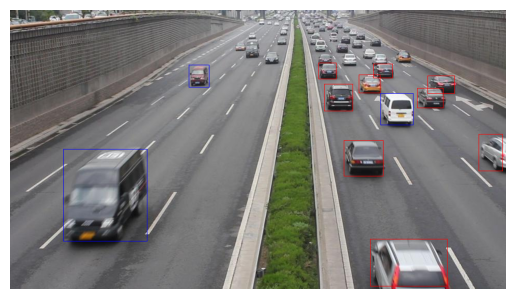

In [17]:
img = skimage.io.imread(img_path)
for r in anno:
    rr, cc = skimage.draw.rectangle_perimeter((r[1], r[0]), end = (r[3], r[2]), shape = img.shape)
    if r[-2] == 1:
        img[rr, cc] = [255, 0, 0]
    else:
        img[rr, cc] = [0, 0, 255]
plt.imshow(img)
plt.axis("off")
plt.show()